### Students: Christian Tesch, Robert Wienröder

# Assignment 3

In [1]:
# Import Numpy and Pandas once for all tasks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 1 (1 point)

**Indexing 2D Arrays** 

Write a function that takes a 2D array as an argument with **at least 3 rows and 3 columns** (throw an exception, if the user provides too few dimensions). The matrix is then stripped of the 'outer' rows and columns and only the remaining inner matrix is returned. Below a visual example for a 4x5 matrix:

$$
\begin{bmatrix} 
    \cdot & \cdot & \cdot & \cdot & \cdot \\
    \cdot & O & O & O & \cdot \\
    \cdot & O & O & O & \cdot \\
    \cdot & \cdot & \cdot & \cdot & \cdot
\end{bmatrix}
$$

Test your function for the matrix below. Don't forget to write the docstrings.

In [2]:
def strip_mat(arr: np.ndarray) -> np.ndarray:
    """Returns a stripped matrix by removing the first and last row and column
    from the input array arr.
    Args:
        arr (np.ndarray): Matrix to be stripped. Must be ndarray with shape
        (n_rows, n_cols), where n_rows, n_cols > 2.
        
    Returns:
        np.ndarray: Stripped matrix
    """
    # input sanity checks
    
    # type checking
    if not isinstance(arr, np.ndarray):
        raise TypeError(f'For argument arr expected np.ndarray sort of type. '
                        f'Got {type(arr)}.')
    
    # check if 2d array
    if not len(arr.shape) == 2:
        raise ValueError('arr is not 2d.')
    
    # check if at least 2 rows and 2 columns
    n_rows, n_cols = arr.shape
    if not (n_rows > 2 and n_cols > 2):
        raise ValueError(
            'arr does not meet minimal row and/or column count criteria.')
    
    # stripping the array of outer rows and columns
    return arr[1:-1, 1:-1].copy()

In [3]:
# When applying your function to the following matrix, the output should be as below:
arr1 = np.ones((4,5)) * np.arange(1,6) - np.arange(4).reshape((4,1)) # same matrix as in Numpy lecture
print(strip_mat(arr1))

[[1. 2. 3.]
 [0. 1. 2.]]


## Task 2 (1 point)

**Arrays of Random Variables**

Create a ``numpy`` array with 10000 rows and 2 columns. The first column should contain Gaussian distributed variables with mean 1 and standard deviation 2 and the second column should contain Gaussian distributed variables with mean -2 and standard deviation 0.5. 

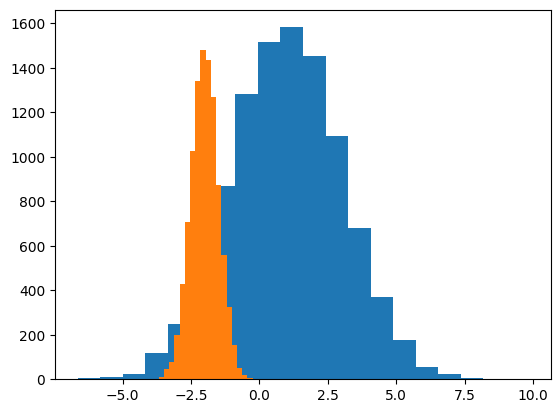

In [4]:
# array creation
rand_arr = np.random.normal([1, -2], [2, 0.5], (10000,2))

# When plotted as histograms, the two columns should look roughly like this:
plt.hist(rand_arr[:,0], bins = 20)
plt.hist(rand_arr[:,1], bins = 20)
plt.show()

## Task 3 (1 point)

**Polar Coordinates**

Let $P = (x, y)$ be a point in the standard 2D-space. Its cartesian coordinates can be converted into polar coordinates by applying the transformations:

$$
r = \sqrt{x^2 + y^2}
$$

for the radius $r$ and 

$$
\varphi = tan^{-1}(\frac{y}{x})
$$

for the angle $\varphi$. 

Create a random 10x2 matrix representing cartesian coordinates and convert them to polar.

In [5]:
def plot_cartesian_vs_polar(x_y, r_phi):
    """
    Quick and dirty visualization of cartesian and polar arrays from Task 3.
    Args:
        x_y (np.ndarray): cartesian coordinate like [[x0 y0] [x1 y1] [...]]
        r_phi (np.ndarray): polar coordinate like [[r0 phi0] [r1 phi1] [...]]
    """
    # extract shape=(n) coordinate arrays from input
    x = x_y[:, 0]
    y = x_y[:, 1]
    r = r_phi[:, 0]
    phi = r_phi[:, 1]

    fig = plt.figure(figsize=(9, 5))

    # cartesian plot
    ax_cart = plt.subplot(1,2,1) # nrows, ncols, index, ...
    ax_cart.scatter(x, y) # scatter(x, y, ...)
    ax_cart.set_title('cartesian')
    
    # dumb dynamic tick spacing of 1
    # x ticks
    x_locs = ax_cart.get_xticks() # get actual x tick values
    ax_cart.set_xticks(np.arange(x_locs[0], np.ceil(x_locs[-1])))
    # y ticks
    y_locs = ax_cart.get_yticks() # get actual y tick values
    ax_cart.set_yticks(np.arange(y_locs[0], np.ceil(y_locs[-1])))

    ax_cart.set_aspect('equal')
    ax_cart.grid(True)

    # polar plot
    ax_polar = plt.subplot(1,2,2, projection='polar')
    ax_polar.scatter(phi, r) # scatter(angle, distance, ...)
    ax_polar.set_title('polar')

    fig.tight_layout()
    plt.show()

Comparison by row:
(x0, y0) = (-1, 2)	-> (r0, phi0) = (2.24, 2.03)
(x1, y1) = (-3, -4)	-> (r1, phi1) = (5.00, -2.21)
(x2, y2) = (3, -2)	-> (r2, phi2) = (3.61, -0.59)
(x3, y3) = (1, 2)	-> (r3, phi3) = (2.24, 1.11)
(x4, y4) = (-2, 3)	-> (r4, phi4) = (3.61, 2.16)
(x5, y5) = (1, 3)	-> (r5, phi5) = (3.16, 1.25)
(x6, y6) = (4, -5)	-> (r6, phi6) = (6.40, -0.90)
(x7, y7) = (3, -2)	-> (r7, phi7) = (3.61, -0.59)
(x8, y8) = (-4, 0)	-> (r8, phi8) = (4.00, 3.14)
(x9, y9) = (-5, -4)	-> (r9, phi9) = (6.40, -2.47)


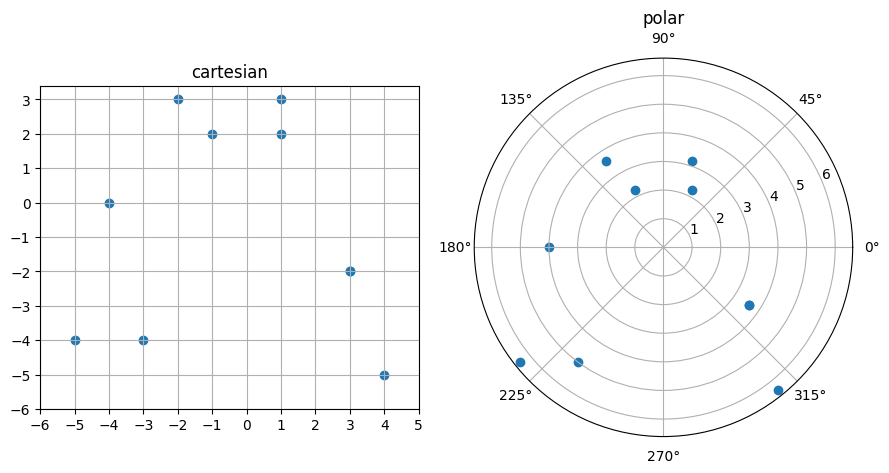

In [6]:
def cartesian_to_polar(xy: np.ndarray) -> np.ndarray:
    """
    Convert an ndarray of shape (n, 2) containing cartesian coordinates to an
    ndarray of shape (n, 2) containing polar coordinates:
    [[x0 y0] [x1 y1] [...]] -> [[r0 phi0] [r1 phi1] [...]]
    Args:
        xy (np.ndarray): cartesian coordinate like [[x0 y0] [x1 y1] [...]]

    Returns:
        np.ndarray: polar coordinates like [[r0 phi0] [r1 phi1] [...]]
    """
    # TODO (optional): implement sanity checks, e.g. matching x, y lengths,
    # etc... Here as this is purely academic it's not worth the effort.
    
    # extract x and y vector from 2d input array
    x = xy[:, 0]
    y = xy[:, 1]

    # create array of complex numbers (x, y) -> z, where x=Re(z) and y=Im(z).
    points = x + 1j * y
    
    # z==[z0 z1 z2 ...] -> [[r0 phi0] [r1 phi1] [r2 phi2] ...],
    # where r is the absolute of z and phi is the argument of z
    return np.array( [np.abs(points), np.angle(points)] ).T


# constants for random number generation
MIN = -5
MAX = 5

# random (uniform) 10x2 array (values from -5 ... 5)
x_y = np.random.randint(MIN, MAX, size=(10, 2)) # like [[x0 y0] [x1 y1] [...]]

# 10x2 array containing polar coordinates
r_phi = cartesian_to_polar(x_y) # like [[r0 phi0] [r1 phi1] [...]]

# print and compare rows of coordinate arrays
print('Comparison by row:')
for row in range(x_y.shape[0]):
    x = x_y[row, 0]
    y = x_y[row, 1]
    r = r_phi[row, 0]
    phi = r_phi[row, 1]
    print(f'(x{row}, y{row}) = ({x}, {y})'
          f'\t-> (r{row}, phi{row}) = ({r:.2f}, {phi:.2f})')

# plot arrays
plot_cartesian_vs_polar(x_y, r_phi)


## Task 4 (1 point)

**Show Me the Stats!**

Download the file *zuwendungen-berlin.csv.gz* from the Pandas lecture folder and load it into a Pandas data frame.

Now print the following statistics

- the count
- the mean
- the standard deviation
- the minimum
- the median
- the maximum
 
**only** for the spendings of the Berlin Senat (the column name in German is *Betrag*).

Your output stats should be:

```[40820.0, 229215.96496815287, 3931963.428809921, 100.0, 16477.0, 487261162.0]```

*Note*: you can inspect a couple of samples of the dataframe with ``df.sample(n=10)`` for better understanding your data.

In [7]:
# loading the data
df = pd.read_csv("zuwendungen-berlin.csv.gz")

# extract series with spendings
spend = df["Betrag"] 

print("The following statistics could be obtained for the spendings for",
      "subsidies of the Berliner Senat (amounts in euro):")
print(f"count:                {spend.count()}")
print(f"mean:                 {spend.mean()}")
print(f"standard deviation:   {spend.std()}")
print(f"minimum:              {spend.min()}")
print(f"median:               {spend.median()}")
print(f"maximum:              {spend.max()}")

The following statistics could be obtained for the spendings for subsidies of the Berliner Senat (amounts in euro):
count:                40820
mean:                 229215.96496815287
standard deviation:   3931963.4288099767
minimum:              100
median:               16477.0
maximum:              487261162


## Task 5 (1 point)

**How much is each recipient of a spending receiving in total?**

Use the previously loaded data frame of spendings, group by recipient (column *Name*) and then sum all money received for each recipient. Print the names of the recipients that received in total **250 euros**. 

In [8]:
# add up all money received for each recipient
sum_for_each = df["Betrag"].groupby(df["Name"]).sum()

# print names of recipients that received in total 250 euros
print(sum_for_each[sum_for_each == 250])

Name
BDH Spandau e. V.                                  250
Fritz-Karsen-Schule                                250
Rudolf Steiner Schule Berlin e.V.                  250
Sozialverband Deutschland, Landesverband Berlin    250
formDDR e. V.                                      250
Name: Betrag, dtype: int64


## Task 6 (1 point)

**How much is Berlin spending on each political ressort?**

Use the previously loaded data frame of spendings, group by political ressort (in German 'Politikbereich') and compute the 

 - minimum
 - median
 - maximum

of the spendings on each political ressort. Print the aggregates in the political ressort ('Politikbereich') 'sciences' ('Wissenschaft').

Your output stats should be 

```[500.0, 115557.5, 41852102.0]```

In [9]:
gb_pol = df.groupby(['Politikbereich'])['Betrag']

spendings_min = gb_pol.min()
spendings_median = gb_pol.median()
spendings_max = gb_pol.max()

print([spendings_min['Wissenschaft'], spendings_median['Wissenschaft'], 
      spendings_max['Wissenschaft']])

[500, 115557.5, 41852102]


## Task 7 (4 points)

**How much is Berlin spending on each U-Bahn?**

At the time this dataset was created, there were 9 metro lines in Berlin.

Use the previously loaded data frame of spendings, filter for transportation (German 'Verkehr'), group by the specific Ubahn and sum up the spendings. At the end, print the Ubahn names ordered from most (first element) to least expensive (last element).

*Note*: For the Ubahn grouping you are interested in the column 'Zweck' (eng. 'purpose'). This column contains a short description of what exactly the money was spent on. The Ubahn signs - *U1, U2... U9* - are hidden in these descriptions. You need to find a way to extract these signs so that you can group according to them. Sometimes there is more than one Ubahn listed in the description; it is fine if you just extract the first one.

In [10]:
# Goal: We want to categorize each entry (i.e. row) by the name of the metro
# (U1, U2, U3, ..., U9) the spending was used for. So we will create a column
# 'ubahn' that will hold a string with the respective name.

# PROBLEM: The 'Zweck' column contains this information, so we will use some
# sort of string extraction. But entries are like this:
# 'Some text U8 and more text u 9'

# We will look for the ubahn name by the following regex pattern:
# Regex pattern: (?i)(U\s*[1-9])
#   ?i: inline case insensitivity
#   \s: match whitespace
#    *: match previous (whitespace) 0 to n times 
#  PROBLEM: matches e.g. "Neubau 2 Aufzüge" -> u 2 -> U2...
# Refined regex pattern: (?i)(\s|^)(U\s*[1-9])
#    (\s|^): Whitespace or start of string https://stackoverflow.com/a/55777608/12785394

# Then we will assign the matched pattern to the generated 'ubahn' column.

# We will only match the first (not all) occurrences, as this simply prevents
# multiple counts of one and the same spending...


In [11]:
# filtering for transportation data
tr = df[df['Politikbereich'] == 'Verkehr'].copy() # copy resolves copy of slice warning

# create ubahn col by extracting described pattern (see above),
# then capitalize all, remove whitespace and nan->'other'
tr['ubahn'] = tr['Zweck'] \
    .str.extract(pat=r'(?i)\s|^(U\s*[1-9])', expand=False) \
    .str.upper() \
    .str.replace(' ', '')\
    .fillna('other')

u_bahn_spending = tr.groupby(['ubahn'])['Betrag'].sum()
u_bahn_count = tr.groupby(['ubahn'])['Betrag'].count()

print('Spendings (Euro)', u_bahn_spending.sort_values(ascending=False))
print('\nCounts', u_bahn_count.sort_values(ascending=False))

Spendings (Euro) ubahn
other    1740631493
U5        684893996
U8        559461848
U2        237905367
U1        149173848
U6        113520585
U7         71003946
U9         22931300
U3          6329800
U4          3894100
Name: Betrag, dtype: int64

Counts ubahn
other    487
U5       101
U2        61
U7        55
U8        39
U6        37
U1        31
U3        15
U9        15
U4         8
Name: Betrag, dtype: int64
